# conculsion:
1.  salary data look skewed. it does not follow bell curve and salary start from 40,000.
2.  Senior Staff has highest salary and senior enginner has lowest salary .	
    

In [1]:
#!pip install psycopg2

In [2]:
import psycopg2 
hostname = 'localhost'
database = 'sql-challenge'
username = 'postgres'
port_id = 5432
# Import API key
from pass_key import pwd

In [3]:
conn = psycopg2.connect(
        host = hostname,
        dbname = database,
        user = username,
        password = pwd,
        port = port_id)


In [4]:
# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# NumPy
import numpy as np

# Create a histogram to visualize the employee salary ranges that were the most common.

In [5]:
# Query All Records in the Salaries Table
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
display(salaries_df.shape)
#DROPING THE NULL VALUE
salaries_df.dropna(subset=['salary'], inplace=True)
display(salaries_df.shape)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(300024, 2)

(300024, 2)

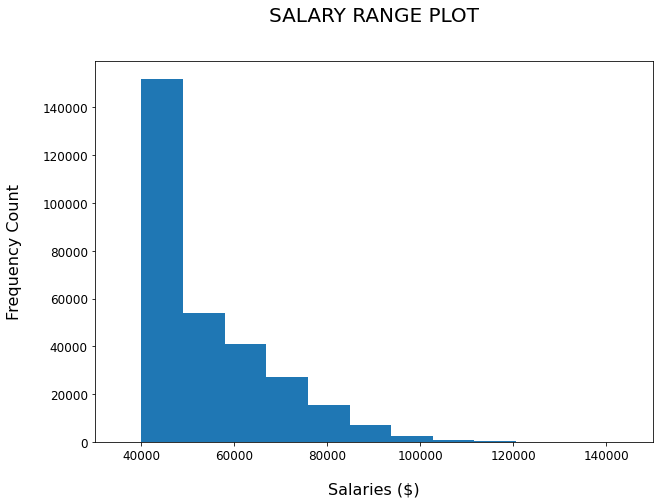

In [6]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(salaries_df['salary'],bins=10,)
plt.title('SALARY RANGE PLOT',fontsize=20,pad=40)
plt.xlabel('Salaries ($)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(30000,150000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

s_mean=salaries_df['salary'].mean()
s_max=salaries_df['salary'].max()
s_min=salaries_df['salary'].min()

# Save Figure
#plt.savefig("./image/employee_salary_ranges.png")
# Show plot
plt.show()

# Create a bar chart of average salary by title.

In [7]:
titles_df = pd.read_sql("SELECT titles,avg(salary) as salary FROM titles inner join employees \
        ON employees.emp_title_id = titles.title_id \
        inner join salaries \
        on employees.emp_no = salaries.emp_no\
        group by titles ", conn)
titles_df.head(10)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,titles,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


Text(0.5, 1.0, 'Average Employee Salary by Title')

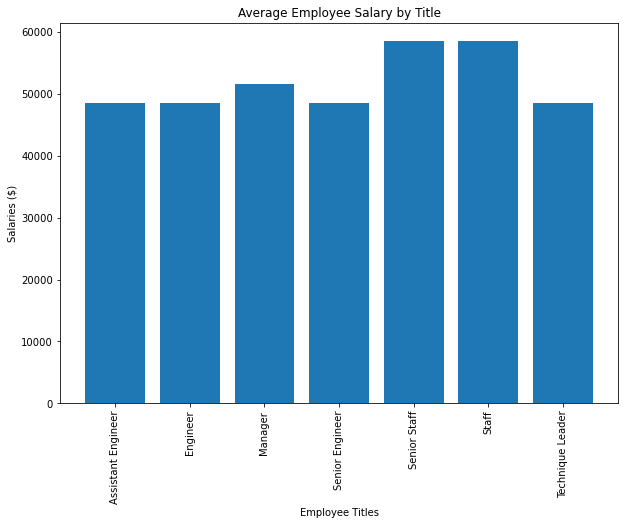

In [8]:
# Set x_axis, y_axis 
x_axis = titles_df["titles"]
ticks = np.arange(len(x_axis))
y_axis = titles_df["salary"]
 
# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center")

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")

# Save Figure
#plt.savefig("./image/average_salary_by_title.png")

# Show plot
#plt.show()